# Twin4Build: Translator Example

This notebook demonstrates how to use the Twin4Build Translator to automatically generate building models from semantic descriptions. You'll learn how to:

1. Load a semantic model from an Excel file
2. Automatically generate a simulation model from semantic descriptions
3. Configure the generated model with custom functions
4. Set up simulation parameters and run simulations
5. Visualize the results and serialize the model

This example showcases the ontology-driven approach to building modeling, where:
- Semantic models describe building components and their relationships
- The Translator automatically generates executable simulation models
- Models maintain links between semantic and simulation representations
- Ontology-based modeling enables interoperability and standardization

The Translator is particularly useful for:
- Automated model generation from building information models (BIM)
- Standardized model creation using SAREF ontologies
- Maintaining semantic consistency across different model representations
- Enabling interoperability between different building modeling tools

## 1. Setup

First, let's install and import the necessary packages. If you're running this in Google Colab, uncomment the pip install line.

In [1]:
import sys
sys.path.append(r"C:\Users\jabj\Documents\python\Twin4Build")

import twin4build as tb
import datetime
from dateutil import tz
import numpy as np
import matplotlib.pyplot as plt
import twin4build.examples.utils as utils
import torch

In [2]:
def fcn(self):
    """
    Custom configuration function to set up the model after translation.
    This function adds missing connections, configures data sources, and sets up control parameters.
    """
    # Add supply water temperature schedule
    supply_water_schedule = tb.ScheduleSystem(
        weekDayRulesetDict = {
            "ruleset_default_value": 60,
            "ruleset_start_minute": [],
            "ruleset_end_minute": [],
            "ruleset_start_hour": [],
            "ruleset_end_hour": [],
            "ruleset_value": []
        },
        id="supply_water_schedule"
    )
    
    # Add boundary temperature schedule
    boundary_temp_schedule = tb.ScheduleSystem(
        weekDayRulesetDict={
            "ruleset_default_value": 21,
            "ruleset_start_minute": [],
            "ruleset_end_minute": [],
            "ruleset_start_hour": [],
            "ruleset_end_hour": [],
            "ruleset_value": [],
        },
        id="boundary_temp_schedule"
    )

    # Add missing connections
    self.add_connection(boundary_temp_schedule, self.components["020B"], "scheduleValue", "boundaryTemperature")
    self.add_connection(supply_water_schedule, self.components["020B_space_heater"], "scheduleValue", "supplyWaterTemperature")

    # Configure sensor data sources
    self.components["020B_temperature_sensor"].useSpreadsheet = True
    self.components["020B_temperature_sensor"].filename = utils.get_path(["estimator_example", "temperature_sensor.csv"])

    self.components["020B_co2_sensor"].useSpreadsheet = True
    self.components["020B_co2_sensor"].filename = utils.get_path(["estimator_example", "co2_sensor.csv"])

    self.components["020B_valve_position_sensor"].useSpreadsheet = True
    self.components["020B_valve_position_sensor"].filename = utils.get_path(["estimator_example", "valve_position_sensor.csv"])

    self.components["020B_damper_position_sensor"].useSpreadsheet = True
    self.components["020B_damper_position_sensor"].filename = utils.get_path(["estimator_example", "damper_position_sensor.csv"])

    self.components["BTA004"].useSpreadsheet = True
    self.components["BTA004"].filename = utils.get_path(["estimator_example", "supply_air_temperature.csv"])

    # Configure control setpoints
    self.components["020B_co2_setpoint"].weekDayRulesetDict = {
        "ruleset_default_value": 900,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_end_hour": [],
        "ruleset_start_hour": [],
        "ruleset_value": []
    }
    
    self.components["020B_occupancy_profile"].weekDayRulesetDict = {
        "ruleset_default_value": 0,
        "ruleset_start_minute": [],
        "ruleset_end_minute": [],
        "ruleset_start_hour": [],
        "ruleset_end_hour": [],
        "ruleset_value": []
    }
    
    self.components["020B_temperature_heating_setpoint"].useSpreadsheet = True
    self.components["020B_temperature_heating_setpoint"].filename = utils.get_path(["estimator_example", "temperature_heating_setpoint.csv"])
    
    # Configure outdoor environment data
    self.components["outdoor_environment"].useSpreadsheet = True
    self.components["outdoor_environment"].filename_outdoorTemperature = utils.get_path(["estimator_example", "outdoor_environment.csv"])
    self.components["outdoor_environment"].datecolumn_outdoorTemperature = 0
    self.components["outdoor_environment"].valuecolumn_outdoorTemperature = 1
    
    self.components["outdoor_environment"].filename_globalIrradiation = utils.get_path(["estimator_example", "outdoor_environment.csv"])
    self.components["outdoor_environment"].datecolumn_globalIrradiation = 0
    self.components["outdoor_environment"].valuecolumn_globalIrradiation = 2
    
    self.components["outdoor_environment"].filename_outdoorCo2Concentration = utils.get_path(["estimator_example", "outdoor_environment.csv"])
    self.components["outdoor_environment"].datecolumn_outdoorCo2Concentration = 0
    self.components["outdoor_environment"].valuecolumn_outdoorCo2Concentration = 3

## 3. Load Model from Semantic File

The Translator automatically generates a simulation model from a semantic description stored in an Excel file. This demonstrates the ontology-driven approach to building modeling.

The semantic file contains:
- Building component definitions using SAREF ontologies
- Component relationships and connections
- Parameter specifications
- System topology information

The Translator processes this semantic information and creates an executable simulation model.

In [3]:
# Create a new model
model = tb.Model(id="translator_example")

# Load the model from semantic file
filename = utils.get_path(["estimator_example", "one_room_example_model.xlsm"])
model.load(semantic_model_filename=filename, fcn=fcn, verbose=False)


Loading model...
   |___Parsing semantic model...[OK]
   |___Drawing semantic model...[OK]
   |___Applying translator...[OK]
   |   |
   |   |___Component: AirToAirHeatRecoverySystem...[OK]
   |   |   |
   |   |   |___Signature pattern: AirToAirHeatRecoverySystem_24, 0 matches found...[OK]
   |   |
   |   |___Component: BuildingSpaceTorchSystem...[OK]
   |   |   |
   |   |   |___Signature pattern: BuildingSpaceTorchSystem_0, 1 matches found...[OK]
   |   |   |___Signature pattern: BuildingSpaceTorchSystemBrick_1, 0 matches found...[OK]
   |   |   |___Signature pattern: BuildingSpaceTorchSystem_2, 1 matches found...[OK]
   |   |   |___Signature pattern: BuildingSpaceTorchSystemBrick_3, 0 matches found...[OK]
   |   |
   |   |___Component: DamperTorchSystem...[OK]
   |   |   |
   |   |   |___Signature pattern: DamperSystem_25, 4 matches found...[OK]
   |   |   |___Signature pattern: DamperSystemBrick_26, 0 matches found...[OK]
   |   |
   |   |___Component: OnOffControllerSystem...[OK]


## 4. Model Overview

Let's examine the generated model to understand its structure and components.

In [4]:
# Display model overview
print(model)

+----------------------------------------------------------------------------------------------------------------------------+
|                                          Model overview    id: translator_example                                          |
+---------------------------------------------+------------------------------------------------------------------------------+
|  Number of components in simulation model:  |                                      18                                      |
+---------------------------------------------+------------------------------------------------------------------------------+
| Number of connections in simulation model:  |                                      23                                      |
+---------------------------------------------+------------------------------------------------------------------------------+
|              Model directory:               | C:\Users\jabj\AppData\Local\Temp\1\generated_files\models\trans

## 5. Set Up Simulation Parameters

Now let's configure the simulation parameters and time period for running the translated model.

In [5]:
# Set up simulation parameters
simulator = tb.Simulator(model)
stepSize = 1200  # 20 minutes in seconds
startTime = datetime.datetime(year=2023, month=11, day=27, hour=0, minute=0, second=0,
                                tzinfo=tz.gettz("Europe/Copenhagen"))
endTime = datetime.datetime(year=2023, month=12, day=1, hour=0, minute=0, second=0,
                            tzinfo=tz.gettz("Europe/Copenhagen"))

print(f"Simulation period: {startTime} to {endTime}")
print(f"Step size: {stepSize} seconds ({stepSize/60:.1f} minutes)")

# Get reference to the heating controller for later use
heating_controller = model.components["020B_temperature_heating_controller"]

Simulation period: 2023-11-27 00:00:00+01:00 to 2023-12-01 00:00:00+01:00
Step size: 1200 seconds (20.0 minutes)


## 6. Run Simulation

Now let's run the simulation using the translated model. This will demonstrate that the automatically generated model is fully functional.

In [6]:
# Run simulation
print("Running simulation...")
simulator.simulate(
    stepSize=stepSize,
    startTime=startTime,
    endTime=endTime
)
print("Simulation completed!")

Running simulation...


100%|██████████| 288/288 [00:00<00:00, 312.28it/s]

Simulation completed!


## 7. Visualize Results

Let's a plot to visualize the simulation results. This will show:

- Indoor and outdoor temperatures
- Heating setpoints and control signals
- Space heater power consumption
- Heat gains to the space
- Water flow rates through the heating system


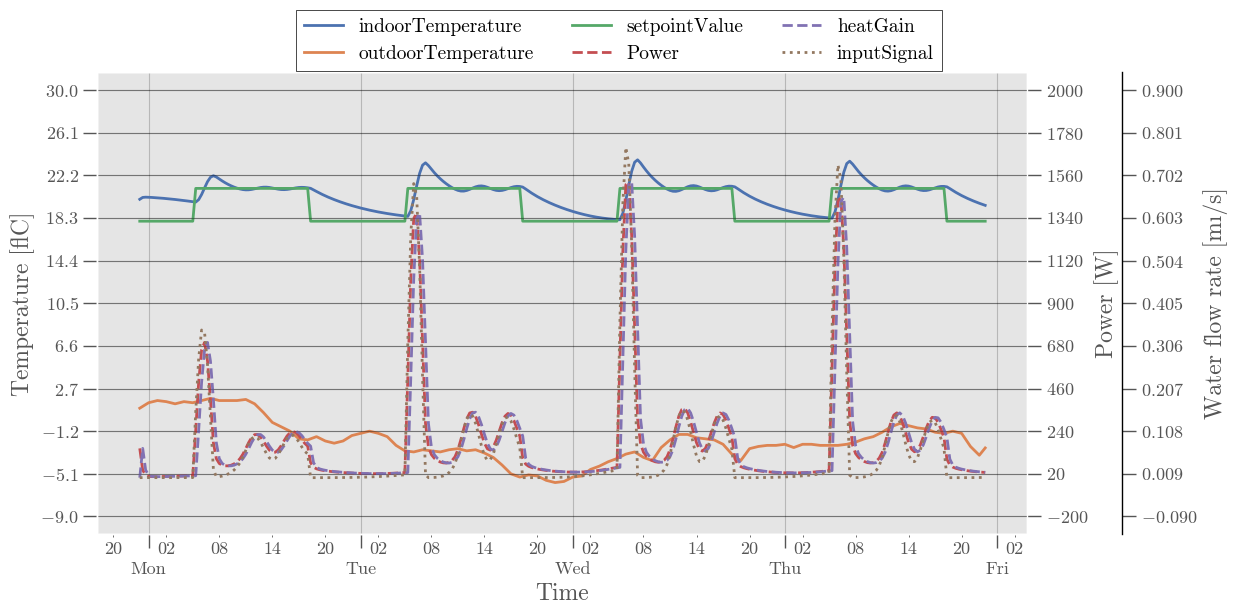

In [7]:
# Plot simulation results
fig, axes = tb.plot.plot_component(
    simulator,
    components_1axis=[
        ("020B", "indoorTemperature", "output"),
        ("outdoor_environment", "outdoorTemperature", "output"),
        (heating_controller.id, "setpointValue", "input"),
    ],
    components_2axis=[
        ("020B_space_heater", "Power", "output"),
        ("020B", "heatGain", "input"),
    ],
    components_3axis=[
        (heating_controller.id, "inputSignal", "output"),
    ],
    ylabel_1axis="Temperature [°C]",
    ylabel_2axis="Power [W]",
    ylabel_3axis="Water flow rate [m³/s]",
    title="Translated Model Simulation Results",
    show=True,
    nticks=11
)

## 8. Serialize the Model

Let's serialize the translated model to save it for future use.

In [8]:
# Serialize the model for later use
print("Serializing model...")
model.serialize()
print("Model serialized successfully!")

# The model is now saved and can be loaded later without re-translation
print(f"Model saved to: {model.get_dir()}")

Serializing model...
Model serialized successfully!
Model saved to: ('C:\\Users\\jabj\\AppData\\Local\\Temp\\1\\generated_files\\models\\translator_example', False)


## 9. Loading the Model

Finally, to later load the serialized model, we simply use the Model.load() method. 

In [ ]:
new_model = tb.Model(id="new_model")
# Get the directory for where it was saved
filename_simulation, _ = model._simulation_model._semantic_model.get_dir(filename="semantic_model.ttl")
new_model.load(simulation_model_filename=filename_simulation)


[OK]
Loading model...[OK]
   |___Loading simulation model...[OK]
   |   |
   |   |___Loading model from RDF file...[OK]
   |   |___Removing cycles...[OK]
   |   |___Determining execution order...[OK]
   |   |___Loading parameters...[OK]
   |   |   |
   |   |
   |   |___Validating model...[WARNING]
   |   |   |
   |   |   |___|CLASS: BuildingSpaceTorchSystem|ID: 020B|: Missing connections for the following input(s) to enable use of Simulator, Estimator, and Optimizer:
   |   |   |   |
   |   |   |   |___adjacentZoneTemperature
   |   |   |
   |   |   |___|CLASS: SensorSystem|ID: BTA004|: Missing connections for the following input(s) to enable use of Simulator, Estimator, and Optimizer:
   |   |   |   |
   |   |   |   |___measuredValue
   |   |   |
   |   |
   |   |___Validated for Simulator...FAILED
   |   |___Validated for Estimator...FAILED
   |   |___Validated for Optimizer...FAILED
   |   |___
   |
   |___Drawing simulation model...
[OK]

Model loaded...

## Summary

This example demonstrated the power of the Twin4Build Translator:

### Key Features Demonstrated:
1. **Automatic Model Generation**: The Translator automatically created a functional simulation model from semantic descriptions
2. **Ontology-Driven Modeling**: Used SAREF ontologies to ensure semantic consistency
3. **Custom Configuration**: Extended the generated model with domain-specific knowledge
4. **Full Functionality**: The translated model runs complete simulations with realistic results
5. **Persistence**: Models can be serialized and reused

### Benefits of the Translator:
- **Interoperability**: Models can be shared between different tools using standard ontologies
- **Automation**: Reduces manual model creation effort
- **Consistency**: Ensures semantic consistency across model representations
- **Extensibility**: Generated models can be customized for specific use cases
- **Standards Compliance**: Uses established building modeling standards (SAREF)

### Next Steps:
- Explore more complex building topologies
- Integrate with BIM tools for automatic semantic model generation
- Use the translated models for parameter estimation and optimization
- Extend the semantic model with additional building components

The Translator represents a key innovation in building modeling, bridging the gap between semantic descriptions and executable simulation models.